# **K-Means**

K-Means clustering is one of the most popular unsupervised machine learning algorithms used for grouping a set of objects into a certain number of clusters, where each object belongs to the cluster with the nearest mean. Here's a step-by-step breakdown of the intuition behind K-Means:

### 1. **What is K-Means Clustering?**
K-Means is a **centroid-based** clustering algorithm. The goal is to partition a dataset into `K` clusters (where `K` is a user-specified number), where each data point in the cluster is more similar to other points in the same cluster than to points in different clusters.

### 2. **How Does K-Means Work?**
The basic idea is to start with `K` random centroids (representing the center of each cluster) and iteratively adjust the centroids and the assignment of points to clusters to minimize the sum of squared distances between points and their respective centroids. This is done in two main steps, repeated until convergence.

#### **Steps of the K-Means Algorithm:**
1. **Initialization**: 
   - Choose `K` initial centroids. These can be selected randomly from the data points, or using advanced initialization methods like the **K-Means++** algorithm to improve the convergence rate.

2. **Assign Points to Nearest Centroid**:
   - For each data point, calculate the distance (typically Euclidean distance) from the point to each of the `K` centroids. 
   - Assign each point to the cluster whose centroid is nearest.

3. **Recalculate Centroids**:
   - Once all points are assigned to clusters, recalculate the centroids of the clusters. The new centroid of each cluster is the mean (average) of all the points assigned to that cluster.

4. **Repeat**:
   - Repeat steps 2 and 3 until the centroids no longer change or the change is minimal (this is the convergence criterion). This means the algorithm has converged to a solution where each point is assigned to the correct cluster.


### 3. **Intuitive Explanation**
#### **Goal**: 
The goal is to minimize the **sum of squared distances** between the points in each cluster and the centroid of that cluster. Mathematically, this is the **Within-Cluster Sum of Squares (WCSS)**.

- Imagine that each data point is a dot in a multi-dimensional space (e.g., in a 2D space, each data point is a coordinate like (x, y)).
- The centroids act as the "center" or "average" of a cluster. Initially, they are chosen randomly, but the algorithm refines them by moving them closer to the "center" of the points assigned to that cluster.

#### **Why K-Means?**
- **Simplicity**: K-Means is relatively simple to understand and implement. 
- **Efficiency**: It can scale to large datasets, making it computationally efficient (though it has some limitations).
- **Greedy Nature**: The algorithm is greedy in nature. It finds a local minimum (i.e., the best configuration of clusters it can find based on the initial centroids).

### 4. **Convergence and the Elbow Method**
- **Convergence**: The algorithm converges when the centroids stabilize (i.e., they don't change anymore) or when a set number of iterations is reached. However, because it’s greedy, K-Means can only guarantee finding a **local minimum**, not necessarily the global minimum.
  
- **Elbow Method**: To determine the optimal value of `K`, we can use the **elbow method**, which involves plotting the **sum of squared distances** (WCSS) for different values of `K` and looking for a point where the reduction in WCSS slows down. This point is often referred to as the "elbow," and it suggests the optimal `K`.

### 5. **Limitations of K-Means**
- **Choice of `K`**: K-Means requires the user to specify `K`, the number of clusters, in advance. However, finding the "right" value of `K` can be challenging without using methods like the elbow method.
- **Sensitivity to Initial Centroids**: If the initial centroids are chosen poorly, K-Means can converge to a suboptimal solution. This is one reason why multiple runs with different initializations (or using K-Means++) can help improve results.
- **Shape of Clusters**: K-Means assumes that clusters are spherical and of similar size, which may not always be true. It struggles with clusters of irregular shapes or different densities.
- **Sensitivity to Outliers**: K-Means is sensitive to outliers because the centroids are calculated as the mean of all points in a cluster, and outliers can distort this mean.

### 6. **Variants of K-Means**
- **K-Means++**: A smarter initialization method that tries to pick initial centroids that are farther apart from each other. This can lead to better convergence and faster results.
- **Mini-Batch K-Means**: A faster version that works by using random samples of the data to update centroids instead of using the entire dataset, which is useful for large datasets.
- **Gaussian Mixture Models (GMM)**: A more flexible clustering algorithm that assumes that data points are generated from a mixture of several Gaussian distributions, providing a probabilistic model for clustering.

### 7. **Mathematical Formulation**
To understand the "objective" of the K-Means algorithm more formally:

- Suppose you have a dataset $( X = \{ x_1, x_2, ..., x_n \} )$ where each $( x_i \in \mathbb{R}^d )$ (d-dimensional data points).
- The objective is to partition $( X )$ into $( K )$ clusters, minimizing the following cost function (sum of squared distances):
  
  $[
  J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
  ]$
  where:
  - $( C_k )$ is the set of points assigned to cluster $( k )$,
  - $( \mu_k )$ is the centroid of cluster \( k \),
  - $( \| \cdot \| )$ is the Euclidean distance.

The algorithm minimizes this cost by iteratively updating the assignments and centroids.

### Step 1: Install Required Libraries

In [1]:
# ! pip install numpy pandas matplotlib scikit-learn

### Step 2: Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Step 3: Create Synthetic Data

We can create some synthetic data using `make_blobs` to simulate a clustering scenario.

/var/folders/8y/3b6b9p6d5vjg7ql8yvqrf69w0000gn/T/ipykernel_1650/2900267339.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


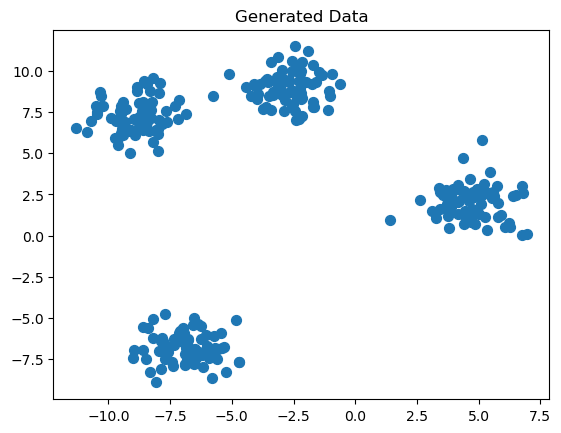

In [3]:
# Create synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data")
plt.show()

### Step 4: Apply K-Means Clustering

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


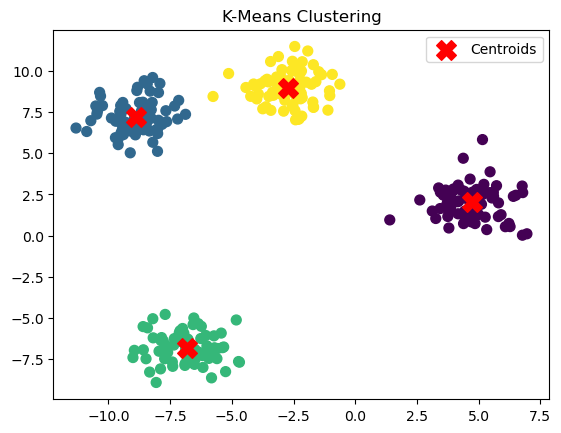

In [4]:
# Apply KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get the predicted cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


### Step 5: Finding the Optimal Number of Clusters (Elbow Method)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

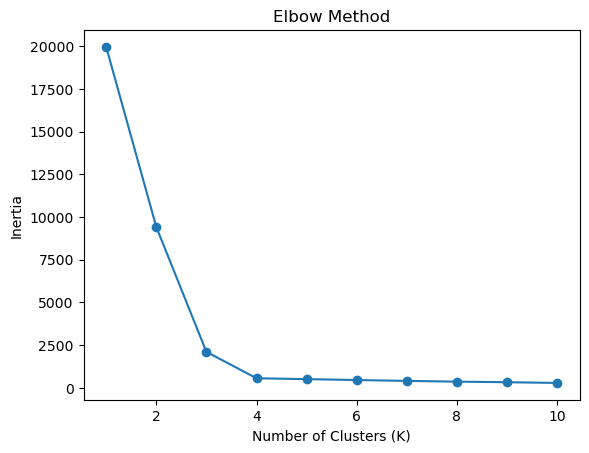

In [5]:
# Calculate inertia for different values of K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia vs K
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

### Step 6: Mini-Batch K-Means (Optional)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


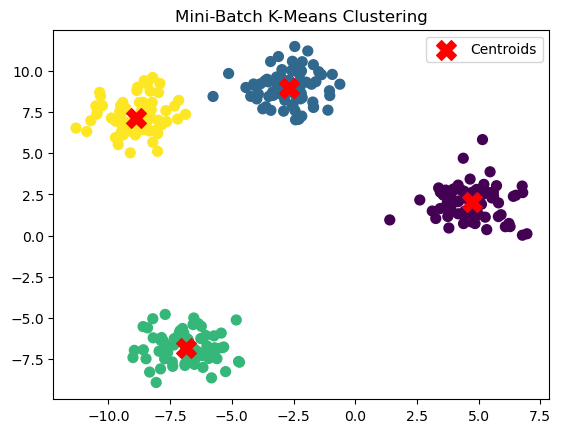

In [6]:
from sklearn.cluster import MiniBatchKMeans

# Apply Mini-Batch K-Means with K=4
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42)
mini_batch_kmeans.fit(X)

# Get the predicted cluster centers and labels
mini_batch_centroids = mini_batch_kmeans.cluster_centers_
mini_batch_labels = mini_batch_kmeans.labels_

# Visualize the Mini-Batch clusters
plt.scatter(X[:, 0], X[:, 1], c=mini_batch_labels, cmap='viridis', s=50)
plt.scatter(mini_batch_centroids[:, 0], mini_batch_centroids[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("Mini-Batch K-Means Clustering")
plt.legend()
plt.show()


## Step 7: Evaluating the Clustering Results

In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K=4
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.79


# **K-Means ++**

### Step 1: Install Libraries

In [8]:
# ! pip install numpy pandas matplotlib scikit-learn

### Step 2: Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Step 3: Create Synthetic Data

/var/folders/8y/3b6b9p6d5vjg7ql8yvqrf69w0000gn/T/ipykernel_1650/3734293126.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


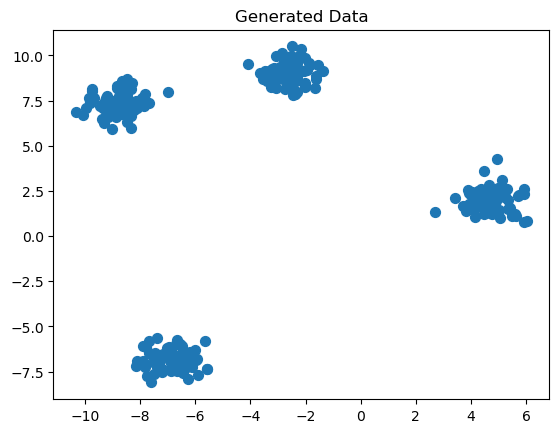

In [10]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data")
plt.show()

### Step 4: Apply K-Means with K-Means++ Initialization

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


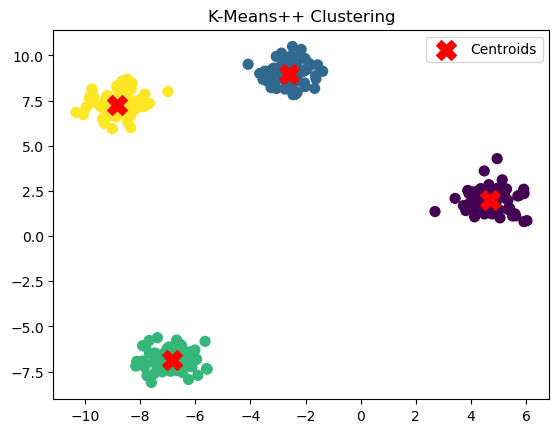

In [11]:
# Apply K-Means with KMeans++ initialization
kmeans_plus_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus_plus.fit(X)

# Get the predicted cluster centers and labels
centroids_plus_plus = kmeans_plus_plus.cluster_centers_
labels_plus_plus = kmeans_plus_plus.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_plus_plus, cmap='viridis', s=50)
plt.scatter(centroids_plus_plus[:, 0], centroids_plus_plus[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-Means++ Clustering")
plt.legend()
plt.show()

### Step 5: Compare K-Means++ vs Random Initialization

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


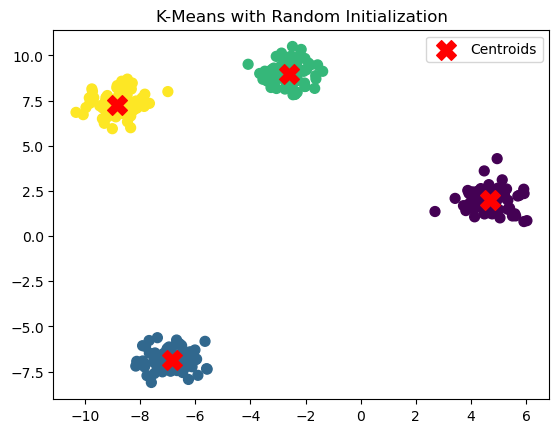

In [12]:
# Apply K-Means with random initialization (default)
kmeans_random = KMeans(n_clusters=4, init='random', random_state=42)
kmeans_random.fit(X)

# Get the predicted cluster centers and labels
centroids_random = kmeans_random.cluster_centers_
labels_random = kmeans_random.labels_

# Visualize the clusters for K-Means with random initialization
plt.scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis', s=50)
plt.scatter(centroids_random[:, 0], centroids_random[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-Means with Random Initialization")
plt.legend()
plt.show()

### Step 6: Visual Comparison

You now have two different clusterings: one using K-Means++ and one using the random initialization. You can compare the following:

**1. K-Means++:** The centroids are more evenly spaced out, which helps K-Means converge to a better solution faster.

**2. Random Initialization:** The centroids might be poorly initialized, which could lead to slower convergence or getting stuck in suboptimal solutions.

### Step 7: Evaluate Clustering Performance

In [13]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means++ clustering
sil_score_plus_plus = silhouette_score(X, labels_plus_plus)
print(f"Silhouette Score (K-Means++): {sil_score_plus_plus:.2f}")

# Silhouette score for K-Means with random initialization
sil_score_random = silhouette_score(X, labels_random)
print(f"Silhouette Score (Random Initialization): {sil_score_random:.2f}")

Silhouette Score (K-Means++): 0.88
Silhouette Score (Random Initialization): 0.88


### Step 8: Observations

- **K-Means++ Initialization:** Typically results in better and faster convergence, and the silhouette score should be higher (closer to 1).

- **Random Initialization:** Often leads to poorer clustering and potentially lower silhouette scores. In some cases, it might converge to suboptimal solutions.

**Summary**

- **K-Means++** is an improvement over traditional random initialization, spreading the centroids out more effectively and leading to faster and better convergence.

- We used synthetic data to apply both methods, and we visually compared the clustering results.

- Silhouette scores were used to evaluate the quality of clustering for both methods.